# Main notebook
This notebook is able to reproduce all experiments and plots described in the reproducibility paper.

### Summary:
* ##### [Reproducing models and data for main claims.](#Reproducing-models-and-data-for-main-claims)
* ##### [Reproducing models and data for visualization.](#Reproducing-models-and-data-for-visualization)
* ##### [Reproducing original plots.](#Reproducing-original-plots)
* ##### Additional visualization

In [1]:
import torch
import numpy as np
import os

%load_ext autoreload
device = "cuda" if torch.cuda.is_available() else "cpu"
IFLOW_FOLDER = 'iFlow_experiment'
IVAE_FOLDER = 'iVAE_experiment'
NUMBER_OF_SEEDS_MAIN = 2
NUMBER_OF_SEEDS_VISUALIZATION = 2


# Reproducing models and data for main claims
In the cell below the hyperparameters from theh iFlow paper are used to reproduce the original results. For accurate reproduction you need to run it on a gpu, since the cpu you will get different results.  

For information about other paramaters consult the main.py in the iFlow folder by excuting `!python iFlow/main.py -h` in a code cell.

In [ ]:
cuda_flag = '-c' if device == "cuda" else ""

for i in range(1, NUMBER_OF_SEEDS_MAIN + 1):
    command_line = '1000_40_5_5_3_{seed}_gauss_xtanh_u_f'.format(seed=i)
    !python 'main.py' \
            '-x' {command_line}\
            '-i' 'iFlow' '-ft' 'RQNSF_AG' \
            '-npa' 'Softplus' \
            '-fl' '10' \
            '-lr_df' '0.25' \
            '-lr_pn' '10' \
            '-b' '64' \
            '-e' '20' \
            '-l' '1e-3' \
            '-exp' {IFLOW_FOLDER} \
            {cuda_flag} \
            '-s' '1' 

for i in range(1, NUMBER_OF_SEEDS_MAIN + 1):
    command_line = '1000_40_5_5_3_{seed}_gauss_xtanh_u_f'.format(seed=i)
    !python 'main.py' \
            '-x' {command_line}\
            '-i' 'iVAE' \
            '-lr_df' '0.25' \
            '-lr_pn' '10' \
            '-b' '64' \
            '-e' '20' \
            '-l' '1e-3' \
            '-g' '50' \
            '-d' '3' \
            '-exp' {IVAE_FOLDER} \
            {cuda_flag} \
            '-s' '1' 


# Reproducing models and data for visualization
In the cell below the data and models are produced used for the visualiation of the latent dimensions. This means that data and the latent dimension are both 2 instead of 5 as this enables us to plot on a 2D graph.

In [6]:
cuda_flag = '-c' if device == "cuda" else ""
iFlow_vis_folder = 'visualization_' + IFLOW_FOLDER
iVAE_vis_folder = 'visualization_' + IVAE_FOLDER 


for i in range(1, NUMBER_OF_SEEDS_VISUALIZATION + 1):
    command_line = '1000_5_2_2_3_{seed}_gauss_xtanh_u_f'.format(seed=i)
    !python 'main.py' \
            '-x' {command_line}\
            '-i' 'iFlow' '-ft' 'RQNSF_AG' \
            '-npa' 'Softplus' \
            '-fl' '10' \
            '-lr_df' '0.25' \
            '-lr_pn' '10' \
            '-b' '64' \
            '-e' '20' \
            '-l' '1e-3' \
            '-exp' {iFlow_vis_folder} \
            {cuda_flag} \
            '-s' '1' 

for i in range(1, NUMBER_OF_SEEDS_VISUALIZATION + 1):
    command_line = '1000_5_2_2_3_{seed}_gauss_xtanh_u_f'.format(seed=i)
    !python 'main.py' \
            '-x' {command_line}\
            '-i' 'iVAE' '-ft' 'RQNSF_AG' \
            '-lr_df' '0.25' \
            '-lr_pn' '10' \
            '-b' '64' \
            '-e' '20' \
            '-l' '1e-3' \
            '-g' '50' \
            '-d' '3' \
            '-exp' {iVAE_vis_folder} \
            '-s' '1' 

Namespace(anneal=False, batch_size=64, cuda=False, data_args='1000_5_2_2_3_1_gauss_xtanh_u_f', depth=3, epochs=20, experiments_folder='visualization_iFlow_experiment', file=None, flow_length=10, flow_type='RQNSF_AG', gpu_id='0', hidden_dim=50, i_what='iFlow', latent_dim=None, log_freq=25, lr=0.001, lr_drop_factor=0.25, lr_patience=10, max_iter=None, nat_param_act='Softplus', no_log=False, num_bins=8, preload=False, seed=1)
Creating dataset data/1/tcl_1000_5_2_2_3_1_gauss_xtanh_u.npz ...
 ... done
training on cpu
data loaded on cpu
setup time: 1.560680627822876s
Beginning training for exp: 1
.. checkpoint at iteration 0 ..
epoch 1: 5.1743s;	loss: 0.1176 (l1: 1.1614, l2: 0.3466, l3: -1.3905);	perf: 0.8587
epoch 2: 6.2169s;	loss: 0.3563 (l1: 1.1219, l2: 0.3881, l3: -1.1537);	perf: 0.7759
epoch 3: 8.9264s;	loss: -0.0596 (l1: 1.0792, l2: 0.4811, l3: -1.6199);	perf: 0.8992
epoch 4: 8.2426s;	loss: -0.6675 (l1: 1.0440, l2: 0.3947, l3: -2.1062);	perf: 0.7474
.. checkpoint at iteration 312 ..
ep

epoch 2: 0.3855s;	loss: 2.3649;	perf: 0.7174
epoch 3: 0.3965s;	loss: 1.9402;	perf: 0.7164
epoch 4: 0.4012s;	loss: 1.8185;	perf: 0.7041
.. checkpoint at iteration 312 ..
epoch 5: 0.3993s;	loss: 1.6529;	perf: 0.6743
epoch 6: 0.4136s;	loss: 1.5316;	perf: 0.6507
epoch 7: 0.4132s;	loss: 1.5055;	perf: 0.6436
epoch 8: 0.4039s;	loss: 1.4704;	perf: 0.6505
.. checkpoint at iteration 624 ..
epoch 9: 0.4031s;	loss: 1.2490;	perf: 0.6755
epoch 10: 0.4060s;	loss: 1.1794;	perf: 0.6761
epoch 11: 0.3957s;	loss: 1.2210;	perf: 0.6856
epoch 12: 0.3964s;	loss: 1.1364;	perf: 0.6862
.. checkpoint at iteration 936 ..
epoch 13: 0.4062s;	loss: 1.1336;	perf: 0.7055
epoch 14: 0.4142s;	loss: 1.1028;	perf: 0.7079
epoch 15: 0.4159s;	loss: 1.0569;	perf: 0.7105
epoch 16: 0.4885s;	loss: 1.0560;	perf: 0.7188
.. checkpoint at iteration 1248 ..
epoch 17: 0.4512s;	loss: 0.9885;	perf: 0.7220
epoch 18: 0.4341s;	loss: 1.0946;	perf: 0.7348
epoch 19: 0.4322s;	loss: 1.0125;	perf: 0.7456
epoch 20: 0.4189s;	loss: 0.9574;	perf: 0.73

# Reproducing original plots


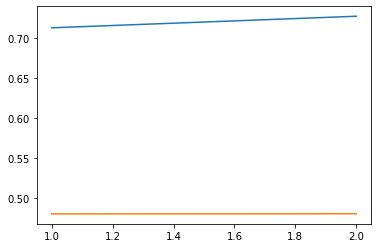

In [15]:
from plot_mcc import plot_mcc, Experiment_folder
%autoreload

folder_paths = [IFLOW_FOLDER, IVAE_FOLDER]
experiments = [Experiment_folder(path, device) for path in folder_paths]

plot_mcc(experiments)

In [48]:
from plot_mcc import plot_latent_correlation
%autoreload

def get_best_model_pairs(iFlow_vis_folder, iVAE_vis_folder):
    iFlow_vis_experiments = Experiment_folder(iFlow_vis_folder, device)
    iVAE_vis_experiments = Experiment_folder(iVAE_vis_folder, device)

    top_iFlow = iFlow_vis_experiments.get_ranked_list("final_performance")[0]
    top_iVAE = iVAE_vis_experiments.get_ranked_list("final_performance")[0]

    best_iFlow_model, best_iFlow_dset = iFlow_vis_experiments.get_model_from_path(top_iFlow[0])
    iVAE_model, _ = iVAE_vis_experiments.get_model_from_experiment(top_iFlow)

    best_iVAE_model, best_iVAE_dset = iFlow_vis_experiments.get_model_from_path(top_iVAE[0])
    iFlow_model, _ = iFlow_vis_experiments.get_model_from_experiment(top_iVAE)
    
    return (best_iFlow_dset, best_iFlow_model, iVAE_model), (best_iVAE_dset, best_iVAE_model, iFlow_model)

comparison_1, comparison_2 = get_best_model_pairs(IFLOW_FOLDER, IVAE_FOLDER)
plot_latent_correlation(comparison[0], compar)
# print(top_iFlow_seed)
# print(top_iVAE_seed)


data loaded on cpu
data loaded on cpu
data loaded on cpu
data loaded on cpu


data loaded on cpu
data loaded on cpu
data loaded on cpu
data loaded on cpu


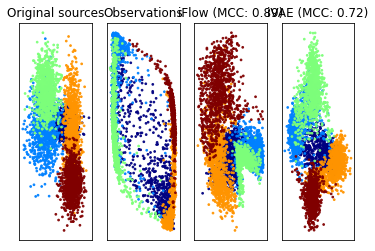

In [47]:
from plot_mcc import create_2D_performance_plot
%autoreload
comparison_1, comparison_2 = get_best_model_pairs(iFlow_vis_folder, iVAE_vis_folder)


create_2D_performance_plot(comparison_1[0], comparison_1[2], comparison_1[1])

In [ ]:
import plot_dataset_difficulty